# Телеком

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## Цель проекта:

Построить модель, со значением метрики качества ROC_AUC не менее 0.85 на тестовой выборке, которая будет прогнозировать, уйдёт клиент от оператора связи в ближайшее время или нет, для того чтобы удержать клиента и вовремя предложить ему промокоды и специальные условия.

## План работ:

1. Загрузка библиотек и знакомство с данными
* Загрузить данные и необходимые библиотеки
* Проверить данные (типы данных, распределение данных, выбросы, пропуски и дубликаты)
* Написать промежуточный вывод

2. Предобработка данных  
* При необходимости изменить типы данных
* Если есть пропуски, выбросы и дубликаты, изучить их и обработать 
* Провести объединение данных для дальнейшей работы над проектом
* Написать промежуточный вывод

3. Исследовательский анализ данных
* Построить графики распределения данных
* Построить матрицу корреляции для количественных признаков
* Провести отбор и анализ важных признаков
* Проверить баланс целевого класса
* Написать промежуточный вывод

4. Подготовка данных для моделирования

5. Моделирование
* Провести борьбу с дисбалансом классов
* Разбить выборку на тренировочную и тестовую выборку в соотношении 3:1.
* Провести обучение моделей. Поскольку это задача классификации, подойдут такие модели как RandomForest, CatBoost
* Проверить результаты на тестовой выборке
* Посмотреть feature_importances_
* Написать промежуточный вывод


6. Выводы и тестирования лучшей модели

# Загрузка данных

In [1]:
pip install phik==0.10.0

     |████████████████████████████████| 599 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve 
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn import preprocessing
import warnings; warnings.filterwarnings("ignore");

In [3]:
try:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
except:
    contract = pd.read_csv('/content/drive/MyDrive/1. Яндекс.Практикум/Проекты/Финальный проект/Данные/contract.csv')

In [4]:
try:
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
except:
    personal = pd.read_csv('/content/drive/MyDrive/1. Яндекс.Практикум/Проекты/Финальный проект/Данные/personal.csv')

In [5]:
try:
    phone = pd.read_csv('/datasets/final_provider/phone.csv')
except:
    phone = pd.read_csv('/content/drive/MyDrive/1. Яндекс.Практикум/Проекты/Финальный проект/Данные/phone.csv')

In [6]:
try:
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
except:
    internet =pd.read_csv('/content/drive/MyDrive/1. Яндекс.Практикум/Проекты/Финальный проект/Данные/internet.csv')

Напишем функцию для ознакомления с данными

In [7]:
def view(df):
    print('Сводная информация')
    print()
    df.info()
    print()
    print('Числовое описание данных')
    print(df.describe(include='all'))
    print()
    print('Наличие пропусков')
    print(df.isnull().sum())
    print()
    print('Наличие дубликатов')
    print(df.duplicated().sum())
    print()
    print('Данные ')
    print(display(df))
    return

In [8]:
view(contract)

Сводная информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Числовое описание данных
        customerID   BeginDate EndDate            Type PaperlessBilling  \
count         7043        7043    7043            7043             7043   
unique        7043          77       5               3                2   
top     8980-WQFWL  2014-02-01      No  Month-to-month              Yes   
freq             1      

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


None


In [9]:
view(personal)

Сводная информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

Числовое описание данных
        customerID gender  SeniorCitizen Partner Dependents
count         7043   7043    7043.000000    7043       7043
unique        7043      2            NaN       2          2
top     8980-WQFWL   Male            NaN      No         No
freq             1   3555            NaN    3641       4933
mean           NaN    NaN       0.162147     NaN        NaN
std            NaN    NaN       0.368612     NaN        NaN
min            NaN    NaN       0.000000     NaN        NaN
25%            

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


None


In [10]:
view(internet)

Сводная информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

Числовое описание данных
        customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     8980-WQFWL     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DevicePr

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


None


In [11]:
view(phone)

Сводная информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

Числовое описание данных
        customerID MultipleLines
count         6361          6361
unique        6361             2
top     8980-WQFWL            No
freq             1          3390

Наличие пропусков
customerID       0
MultipleLines    0
dtype: int64

Наличие дубликатов
0

Данные 


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


None


# Промежуточный вывод

Данные были загружены, выведена информация о датасетах, описание числовых данных, данные проверены на пропуски и дубликаты.

В файле contract (информация о договоре) всего 7043 строк. Данные 
Файл имеет информацию о датах с неправильным типом данных (begindate и enddate). Столбец totalcharges имеет неверный тип данных.

В файле personal (персональные данные клиента) предсталены персональные данные клиентов, всего 7043 строк, как и договоров. 

В файле internet (информация об интернет-услугах) всего 5517 строк, это означает, что не все клиенты пользуются интернет-услугами

В файле phone (информация об услугах телефонии) всего 6360 строк, это означает, не все пользуются многоканальной линией или услуга только телефонии без интернета??? *(дописать позже после уточнения)* 

Во всех файлах стилистически неверно указаны наименования столбцов. Пропусков и дубликатов нет.


# Предобработка данных

Переведем наименование столбцов всех файлов к нижнему регистру.

In [12]:
contract.columns = contract.columns.str.lower()
personal.columns = personal.columns.str.lower()
internet.columns = internet.columns.str.lower()
phone.columns = phone.columns.str.lower()

Заменим тип данных в столбце begin_date на правильный (формат даты).

In [13]:
#contract['begindate'] = pd.to_datetime(contract['begindate'], format='%Y-%m-%d')
contract['begindate'] =  contract['begindate'].apply(pd.to_datetime)

На основании информации о датах в столбце enddate, создадим столбец с целевых признаком, назовем его exited. 0 - вышел, 1 - остался клиентом.

In [14]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [15]:
contract.loc[contract['enddate'] == 'No', 'exited'] = 0
contract.loc[contract['enddate'] != 'No', 'exited'] = 1

In [16]:
contract['exited'] = contract['exited'].astype(int)

А вот заменить тип данных в столбце end_date не получится, поскольку здесь есть текстовые значения 'No', поэтому сначала заменим их на дату выгрузки данных (2020-02-01), а после изменим тип данных.

In [17]:
contract['enddate'] = contract['enddate'].replace('No','2020-02-01')

In [18]:
#contract['enddate'] = pd.to_datetime(contract['enddate'], format='%Y-%m-%d')
contract['enddate'] =  contract['enddate'].apply(pd.to_datetime)

В датасете contract total_charges тип данных object, а должен быть float,
поскольку это числовые данные. Но просто так преобразовать данные не получалось, поэтому поискала что же с ними не так и оказалось, что есть данные вот в таком виде " ".  

Поскольку в дате заключения договора стоит дата 2020-02-01 (дата выгрузки данных), т.е. договор заключен в день выгрузки и данных по total_charges еще нет, клиент еще не оплатил (или информация об оплате еще не прошла). Это всего 11 строк, поэтому удалим эти данные.

In [19]:
contract[contract['totalcharges'] == ' ']

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,0


In [20]:
contract.loc[contract['totalcharges'] == ' ', 'totalcharges'] = np.nan

In [21]:
contract['totalcharges'][(contract['type'] == 'Two year') & (contract['begindate'] == '2020-02-01')] = contract['totalcharges'].fillna(contract['monthlycharges']*24)

In [22]:
contract['totalcharges'][(contract['type'] == 'One year') & (contract['begindate'] == '2020-02-01')] = contract['totalcharges'].fillna(contract['monthlycharges']*12)

In [23]:
contract[contract['begindate'] == '2020-02-01']

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,1261.2,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,486.0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,1940.4,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,618.0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,1345.2,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,476.4,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,608.4,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,480.0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,236.4,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,1760.4,0


In [24]:
contract['totalcharges'] = contract['totalcharges'].astype(float)

In [25]:
contract['totalcharges'].describe()

count    7043.000000
mean     2281.253259
std      2265.703526
min        18.800000
25%       401.900000
50%      1396.250000
75%      3786.600000
max      8684.800000
Name: totalcharges, dtype: float64

Не хватает столбца с количеством дней, сколько клиент пользуется услугами оператора связи, поэтому добавим его и назовем days.

In [26]:
contract['days'] = (contract['enddate'] - contract['begindate']).dt.days

Проверяем внесенные изменения.

In [27]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   exited            7043 non-null   int64         
 9   days              7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 550.4+ KB


In [28]:
contract.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited,days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61


Объединим все файлы в один для дальнейшей работы. *Не получалось объеденить 1 строчкой кода, поэтому сделала 3-мя.*

In [29]:
contract_personal = contract.merge(personal, how='left', on=['customerid'])
contract_personal.shape

(7043, 14)

In [30]:
contract_personal_internet = contract_personal.merge(internet, how='left', on=['customerid'])
contract_personal_internet.shape

(7043, 21)

In [31]:
contract_merge = contract_personal_internet.merge(phone, how='left', on=['customerid'])
contract_merge.shape

(7043, 22)

In [32]:
contract_merge.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited,days,...,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [33]:
contract_merge.isnull().sum()

customerid             0
begindate              0
enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
exited                 0
days                   0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
multiplelines        682
dtype: int64

In [34]:
features_no = ['internetservice', 'onlinesecurity', 'onlinebackup', 
               'deviceprotection', 'techsupport', 'streamingtv',  
               'streamingmovies', 'streamingmovies', 'multiplelines']

In [35]:
for i in features_no:
    contract_merge[i] = contract_merge[i].fillna('No')

In [36]:
contract_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   exited            7043 non-null   int64         
 9   days              7043 non-null   int64         
 10  gender            7043 non-null   object        
 11  seniorcitizen     7043 non-null   int64         
 12  partner           7043 non-null   object        
 13  dependents        7043 non-null   object        
 14  internetservice   7043 n

# Промежуточный вывод

Изменен тип данных в столбцах begindate, enddate и totalcharges.   
Удалены данные, в которых был не заполнен столбец totalcharges.  
Добавлен целевой признак exited и столбец days.




# Исследовательский анализ данных

Проверим распределение целевого признака и исследуем дисбаланс классов.

<AxesSubplot:>

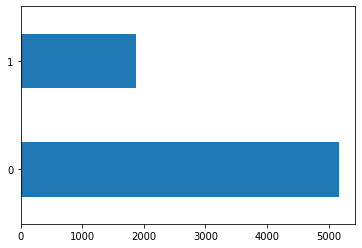

In [37]:
contract_merge['exited'].value_counts().plot(kind='barh')

In [38]:
contract_merge['exited'].value_counts(normalize = 1)

0    0.73463
1    0.26537
Name: exited, dtype: float64

Посмотрим на распределение числовых данных с помощью pairplot.

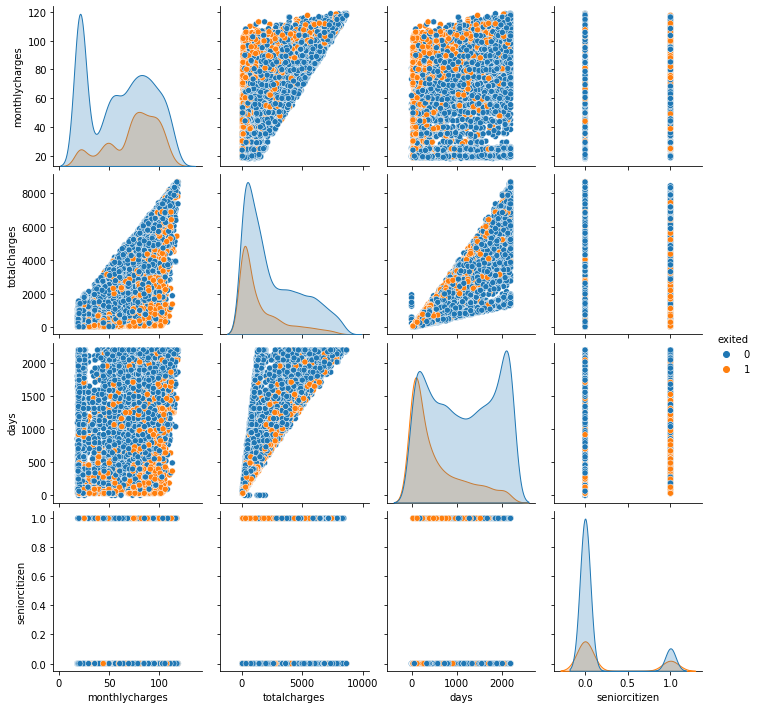

In [39]:
sns.pairplot(contract_merge, hue='exited')

На графике видно, что в основном клиенты уходят в первые дни после заключения договора.

Построим тепловую карту корреляции для количественных данных.

In [40]:
columns_for_cor = ['exited', 'monthlycharges', 'totalcharges', 'exited']

Text(0.5, 1.0, 'Тепловая карта корреляции')

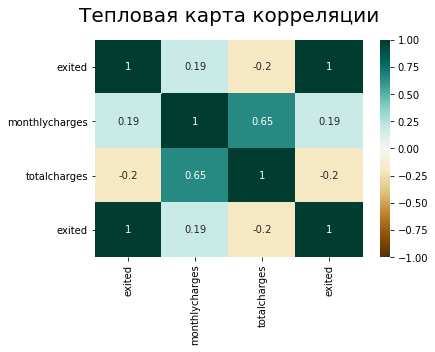

In [41]:
heatmap = sns.heatmap(contract_merge[columns_for_cor].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Тепловая карта корреляции', fontdict={'fontsize':20}, pad=18)

In [42]:
features_for_phik = ['begindate', 'enddate', 'type', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 
                     'totalcharges', 'exited', 'days', 'gender', 'seniorcitizen', 
                     'partner', 'dependents', 'internetservice',  'onlinesecurity',
                     'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 
                     'streamingmovies', 'multiplelines']

In [43]:
df = contract_merge[features_for_phik]
df.head()

,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited,days,gender,...,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,No
1,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [44]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['monthlycharges', 'totalcharges', 'exited', 'days', 'seniorcitizen']


,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,exited,days,gender,...,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
begindate,1.00,0.58,0.77,0.08,0.46,0.42,0.82,0.50,1.00,0.01,...,0.47,0.21,0.19,0.40,0.45,0.46,0.40,0.36,0.37,0.43
enddate,0.58,1.00,0.36,0.16,0.21,0.32,0.25,1.00,0.41,0.00,...,0.12,0.13,0.29,0.14,0.07,0.05,0.13,0.05,0.05,0.03
type,0.77,0.36,1.00,0.11,0.28,0.39,0.51,0.25,0.66,0.00,...,0.18,0.15,0.51,0.15,0.10,0.14,0.18,0.07,0.07,0.07
paperlessbilling,0.08,0.16,0.11,1.00,0.37,0.47,0.21,0.30,0.00,0.00,...,0.01,0.17,0.23,0.00,0.20,0.16,0.06,0.34,0.33,0.25
paymentmethod,0.46,0.21,0.28,0.37,1.00,0.40,0.35,0.45,0.38,0.00,...,0.24,0.22,0.32,0.26,0.28,0.31,0.27,0.38,0.38,0.34
monthlycharges,0.42,0.32,0.39,0.47,0.40,1.00,0.76,0.36,0.41,0.01,...,0.20,0.18,0.92,0.55,0.63,0.67,0.58,0.84,0.83,0.68
totalcharges,0.82,0.25,0.51,0.21,0.35,0.76,1.00,0.28,0.84,0.00,...,0.42,0.12,0.51,0.55,0.66,0.67,0.57,0.66,0.67,0.61
exited,0.50,1.00,0.25,0.30,0.45,0.36,0.28,1.00,0.47,0.00,...,0.23,0.25,0.20,0.26,0.13,0.10,0.25,0.10,0.09,0.06
days,1.00,0.41,0.66,0.00,0.38,0.41,0.84,0.47,1.00,0.00,...,0.49,0.21,0.02,0.42,0.47,0.47,0.42,0.36,0.37,0.43
gender,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00


In [45]:
interval_cols = ['monthlycharges', 'totalcharges', 'exited', 'days', 'seniorcitizen']
phik_overview = df.phik_matrix(interval_cols=interval_cols)

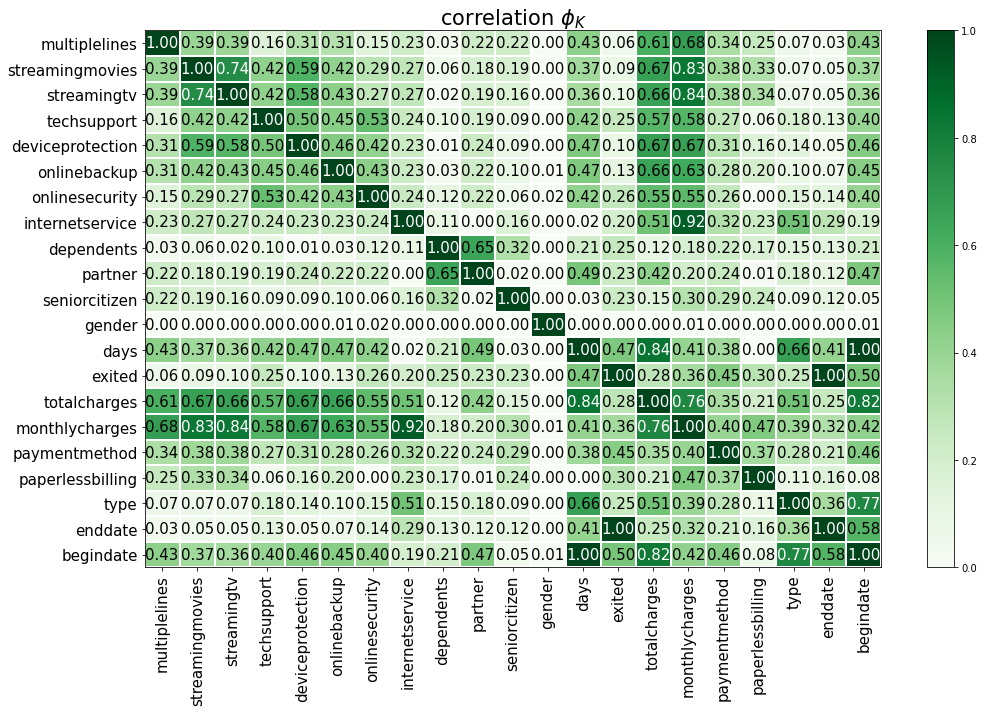

In [46]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(15, 10))
plt.tight_layout()

Мы видим, что существует некоторая корреляция между такими переменными, как monthlycharges internetservice, monthlycharges и totalcharges, streamingmovies и streamingtv. Так же видим, что переменная gender практически не имеет корреляции с другими переменными, а totalcharges имеет корреляцию с несколькими переменными, такими как begindate, monthlycharges, multiplelines, streamingmovies, streamingtv, techsupport, deviceprotection, onlinebackup, onlinesecurity и type.

Проверим распределения признаков в датасете и сразу же сравним признаки для ушедших и оставшихся клиентов. Для этого будем использовать sns.countplot и напишем цикл.

In [47]:
features_for_countplot = ['type', 'paperlessbilling', 'paymentmethod', 
              'partner', 'dependents', 'internetservice',  
              'onlinesecurity', 'onlinebackup', 'deviceprotection', 
              'techsupport', 'streamingtv', 'streamingmovies', 
              'multiplelines', 'gender', 'seniorcitizen']

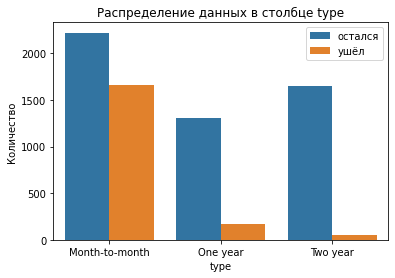

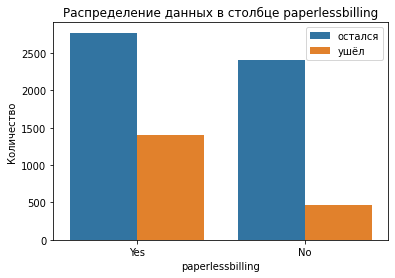

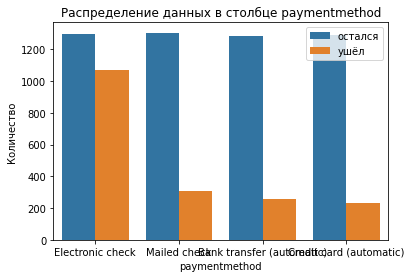

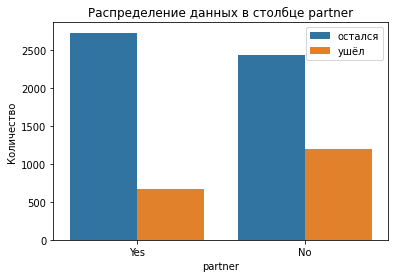

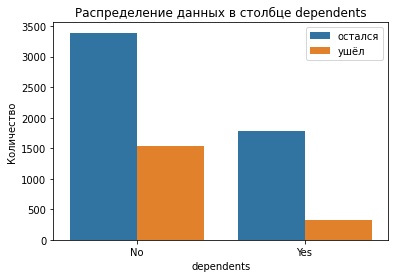

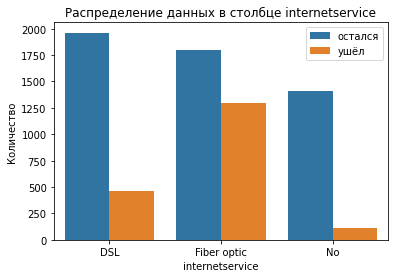

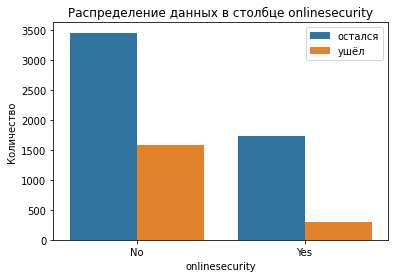

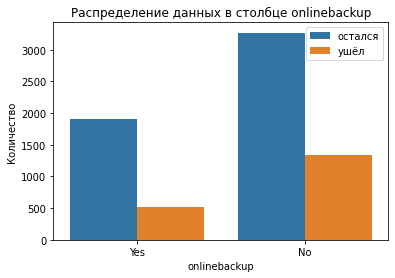

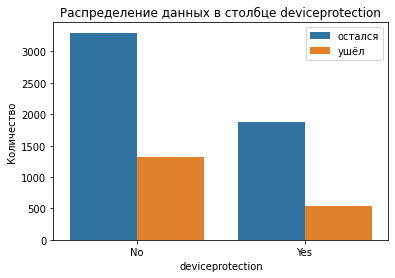

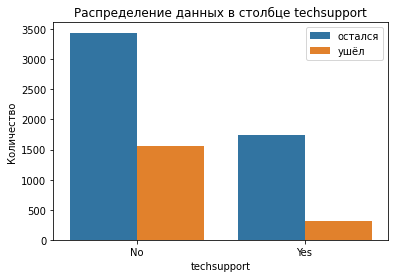

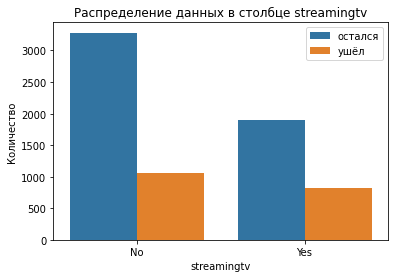

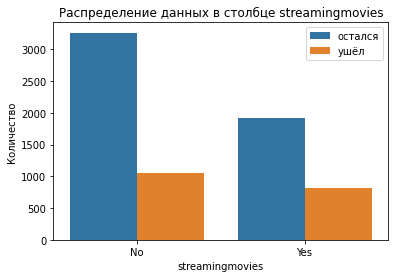

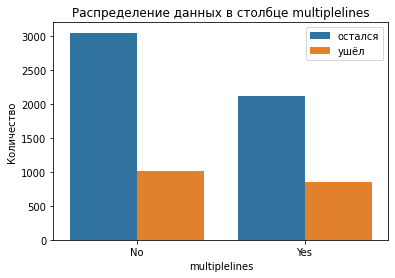

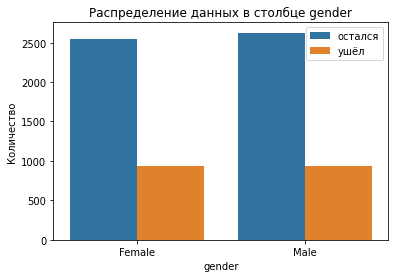

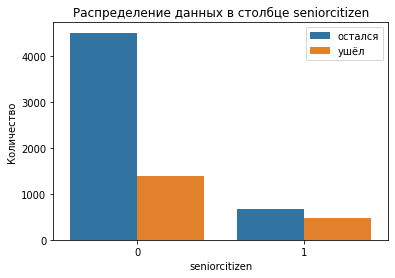

In [48]:
for i in features_for_countplot:
    sns.countplot(x=i, hue='exited', data=contract_merge)

    plt.xlabel(i)
    plt.legend(['остался', 'ушёл'])
    plt.ylabel('Количество')
    plt.title('Распределение данных в столбце '+ i)
    plt.show()

На графиках видно, что больше всего ушедших клиентов:
- оплачивали 1 раз в месяц
- получали бумажный чек
- оплата проходила в электронном виде
- нет партнера
- нет работы
- подключение к интернету по оптоволокну
- не была подключена блокировка небезопасный сайтов
- не было подключено облачного хранилища
- не был подключен антивирус
- не была выделена линия технической поддержки

Построим боксплоты для totalcharges и days. Для этого выделим отдельно названия числовых признаков и напишем функцию.

In [49]:
features_for_boxplot = ['totalcharges','days', 'monthlycharges']

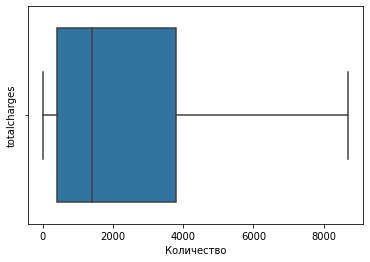

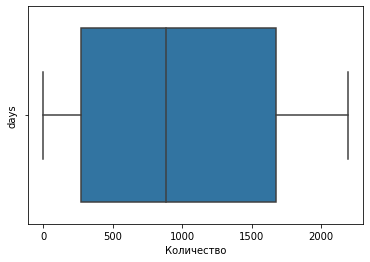

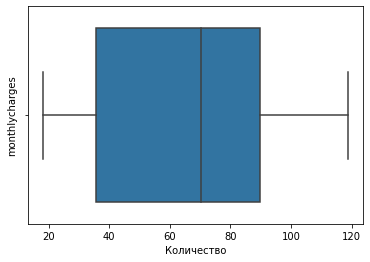

In [50]:
for i in features_for_boxplot:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=contract_merge, x=i, orient='h')
    plt.xlabel('Количество')
    plt.ylabel(i)
    plt.show()

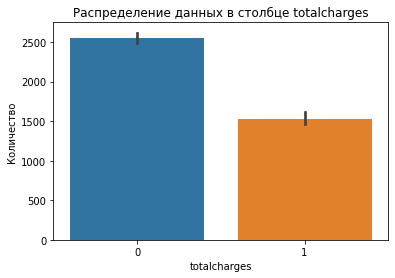

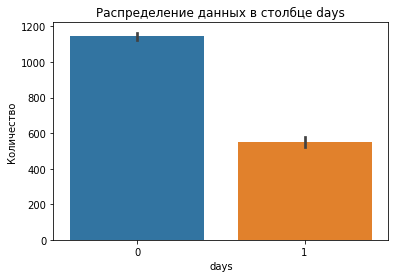

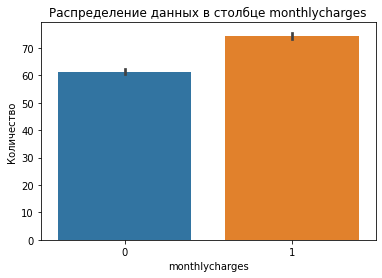

In [51]:
for i in features_for_boxplot:
    sns.barplot(x='exited', y=i, data=contract_merge)
    plt.xlabel(i)
    plt.ylabel('Количество')
    plt.title('Распределение данных в столбце '+ i)
    plt.show()

У ушедших клиентов размер ежемесячного платежа был намного выше, чем у оставшихся

Для начала работы удалим признаки, которые могут повлиять на переобучение моделей. А именно begindate, enddate и customerid.

In [52]:
contract_merge = contract_merge.drop(['begindate', 'enddate', 'customerid'], axis=1)

# Промежуточный вывод

Проведен исследовательский анализ данных,
построена матрица корреляяции для числовых признаков.

Ушедшие клиенты платили в месяц больше, чем оставшиеся.
Многие ушедшие клиенты: 
- пользовались электронной оплатой
- оплачивали услуги 1 раз в месяц
- получали бумажный чек
- не имеют партнера
- не имеют работы
- подключение к интернету по оптоволокну
- не была подключена блокировка небезопасный сайтов
- не было подключено облачного хранилища
- не был подключен антивирус
- не была выделена линия технической поддержки

Удалены признаки begindate и enddate.

# Подготовка данных для моделирования

Посмотрим долю положительного и отрицательного класса.

In [55]:
print('Доля объектов положительного класса составляет:', 
      sum(contract_merge['exited']/len(contract_merge)))

Доля объектов положительного класса составляет: 0.2653698707936851


In [56]:
print('Доля объектов отрицательного класса составляет:', 
      1-sum(contract_merge['exited']/len(contract_merge)))

Доля объектов отрицательного класса составляет: 0.7346301292063149


Дисбаланс классов выявлен, для борьбы с дисбалансом будем использовать class_weight='balanced' при обучении моделей

Разделим данные на обучающую и тестовую выборку в соотношении 3:1, т.е. на тестовую выборку придется 25%. Проверим результат работы функции train_test_split методом shape.

In [57]:
RANDOM_STATE = 180123

In [58]:
target = contract_merge['exited']
features = contract_merge.drop('exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE, 
    stratify=contract_merge.exited)

Проведем масштабирование признаков с помощью StandardScaler.

In [59]:
numeric = ['monthlycharges', 'totalcharges', 'days']

scaler = StandardScaler()
scaler.fit(features_train[numeric])


features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric]) 

pd.options.mode.chained_assignment = None

Проведем порядковое кодирование признаков с помощью OrdinalEncoder().

In [60]:
features_encoder = ['type', 'paperlessbilling', 'paymentmethod', 
                          'gender','partner', 'dependents', 'internetservice', 
                          'onlinesecurity', 'onlinebackup', 'deviceprotection',
                          'techsupport', 'streamingtv', 'streamingmovies', 
                          'multiplelines']

encoder = OrdinalEncoder()

features_train[features_encoder] = pd.DataFrame(
    encoder.fit_transform(contract_merge[features_encoder]), 
    columns=features_train[features_encoder].columns)

features_test[features_encoder] = pd.DataFrame(
    encoder.fit_transform(contract_merge[features_encoder]), 
    columns=features_test[features_encoder].columns)

In [61]:
features_train.head()

,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,days,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
1914,0.0,0.0,2.0,-0.012801,-0.932649,-1.199795,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
563,2.0,1.0,1.0,1.147318,1.569252,1.087830,1.0,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1849,0.0,1.0,2.0,-0.646046,-0.832178,-0.916859,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5443,0.0,0.0,2.0,-0.649370,-0.466826,-0.261145,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,2.0,1.0,0.0,0.474183,1.512111,1.535700,1.0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [62]:
features_test.head()

,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,days,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
593,0.0,1.0,1.0,0.642052,0.063440,-0.097551,1.0,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
865,0.0,1.0,3.0,0.519059,-0.868886,-1.159567,1.0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2705,2.0,0.0,0.0,-1.307546,-0.179204,1.614815,0.0,0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6716,0.0,1.0,1.0,0.302991,-0.908982,-1.201136,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5161,0.0,0.0,2.0,-0.360171,-0.431943,-0.381828,1.0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [63]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(5282, 18)
(1761, 18)
(5282,)
(1761,)


Перейдем к обучению моделей.

# Обучение моделей

Обучим первую модель RandomForestClassifier.Подберем гиперпараметры модели с помощью GridSearchCV и построим для нее ROC-кривую. 

In [64]:
random_forest = RandomForestClassifier(class_weight='balanced', 
                                       bootstrap=True, random_state=RANDOM_STATE)

In [65]:
random_forest_params = {'n_estimators': [150],
                        'max_depth': [10],
                        'min_samples_leaf': range(1,8),
                        'min_samples_split': range(2,10,2)}

In [66]:
random_forest_gscv = GridSearchCV(random_forest, 
                                  random_forest_params,
                                  cv=10,
                                  n_jobs=-1,
                                  scoring='roc_auc')

In [67]:
%%time
random_forest_gscv.fit(features_train, target_train)
round(random_forest_gscv.best_score_,2)

CPU times: user 2min 51s, sys: 1.17 s, total: 2min 52s
Wall time: 2min 52s


0.86

In [68]:
random_forest_gscv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 150}

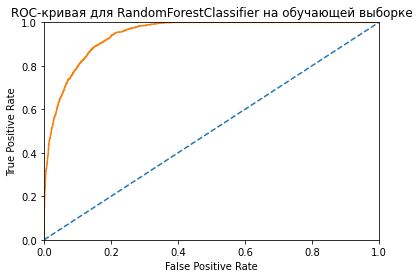

In [69]:
probabilities_random_forest = random_forest_gscv.predict_proba(features_train)
probabilities_one_random_forest = probabilities_random_forest[:, 1]
fpr, tpr, thresholds = roc_curve(target_train, probabilities_one_random_forest)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая для RandomForestClassifier на обучающей выборке")

plt.show()

In [70]:
print('Лучший показатель ROC_AUC на RandomForestClassifier',  
      round(random_forest_gscv.best_score_, 2))

Лучший показатель ROC_AUC на RandomForestClassifier 0.86


Перейдем ко второй модели - CatBoostClassifier. Сначала обучим модель без подбора гиперпараметров, отобразим график. А после подберем гиперпараметры и и построим ROC-кривую для CatBoostClassifier.

In [71]:
cat = CatBoostClassifier(random_state=RANDOM_STATE, loss_function = 'Logloss', custom_loss='AUC')

In [72]:
%%time
cat.fit(features_train, target_train, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 2.45 s, sys: 149 ms, total: 2.6 s
Wall time: 3.82 s


In [73]:
prediction_features_catboost = cat.predict(features_train)
roc_auc_train = roc_auc_score(target_train, prediction_features_catboost)
print(round(roc_auc_train, 2))

0.86


Подберем гиперпараметры, чтобы улучшить результаты. Обучим модель с учетом подбора гиперпараметров.

In [74]:
params = {"iterations": [600],
          "depth": [2],
         'learning_rate': [0.5, 0.6]}

cat_gs = GridSearchCV(cat, params, 
                      verbose=3, 
                      cv=10, 
                      n_jobs = -1, 
                      scoring = 'roc_auc')

In [75]:
%%time
cat_gs.fit(features_train, target_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
0:	learn: 0.5136202	total: 1.34ms	remaining: 803ms
1:	learn: 0.4594243	total: 2.54ms	remaining: 760ms
2:	learn: 0.4330908	total: 3.74ms	remaining: 744ms
3:	learn: 0.4222506	total: 4.79ms	remaining: 713ms
4:	learn: 0.4157867	total: 5.67ms	remaining: 675ms
5:	learn: 0.4099379	total: 6.57ms	remaining: 650ms
6:	learn: 0.4068669	total: 7.52ms	remaining: 637ms
7:	learn: 0.4027154	total: 8.49ms	remaining: 628ms
8:	learn: 0.4005312	total: 9.46ms	remaining: 622ms
9:	learn: 0.3976825	total: 10.4ms	remaining: 613ms
10:	learn: 0.3933847	total: 11.4ms	remaining: 613ms
11:	learn: 0.3918222	total: 12.4ms	remaining: 606ms
12:	learn: 0.3907194	total: 13.3ms	remaining: 601ms
13:	learn: 0.3893438	total: 14.3ms	remaining: 599ms
14:	learn: 0.3881725	total: 15.3ms	remaining: 597ms
15:	learn: 0.3843784	total: 16.5ms	remaining: 602ms
16:	learn: 0.3832795	total: 17.4ms	remaining: 595ms
17:	learn: 0.3825757	total: 18.3ms	remaining: 593ms
18:	learn: 0.

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f3368902640>,
             n_jobs=-1,
             param_grid={'depth': [2], 'iterations': [600],
                         'learning_rate': [0.5, 0.6]},
             scoring='roc_auc', verbose=3)

In [76]:
print('Лучшие показатель ROC_AUC для CatBoostClassifier', round(cat_gs.best_score_,2))

Лучшие показатель ROC_AUC для CatBoostClassifier 0.93


In [77]:
print('Лучшие гиперпараметры для CatBoostClassifier', cat_gs.best_params_)

Лучшие гиперпараметры для CatBoostClassifier {'depth': 2, 'iterations': 600, 'learning_rate': 0.6}


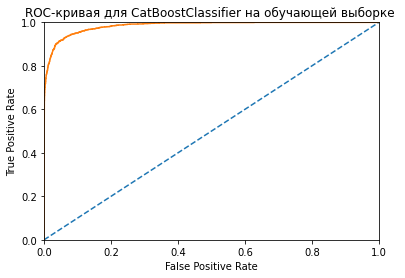

In [78]:
probabilities_test = cat_gs.predict_proba(features_train)
probabilities_one_valid = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_train, probabilities_one_valid)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая для CatBoostClassifier на обучающей выборке ")

plt.show()

Проверим лучшую модель на тестовой выборке. Построим ROC-кривая для тестовой выборки.

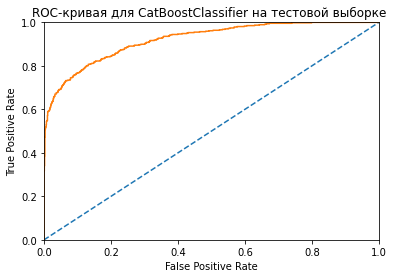

In [79]:
probabilities_test = cat_gs.predict_proba(features_test)
probabilities_one_valid = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая для CatBoostClassifier на тестовой выборке ")

plt.show()

Построим матрицу ошибок для лучшей модели.

Text(0.5, 1.0, 'Матрица ошибок для CatBoostClassifier')

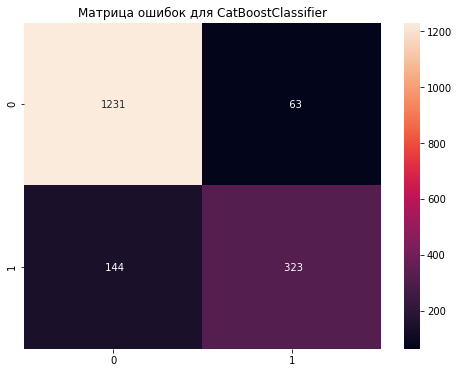

In [80]:
predicted_test = cat_gs.predict(features_test) 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(target_test, predicted_test),annot=True, fmt='4g')
plt.title('Матрица ошибок для CatBoostClassifier')

Лучшая модель в большинстве случаев предсказывает правильный ответ. И чаще предсказывает False Negative, чем Fasle Positive. 

Проверим какой показатель будет у DummyClassifier

In [81]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)

DummyClassifier(strategy='most_frequent')

In [82]:
dummy_clf.predict(features_test)
dummy_proba = dummy_clf.predict_proba(features_test)
probabilities_dummy = dummy_proba[:, 1]
roc_auc_dummy = roc_auc_score(target_test, probabilities_dummy)
print('ROC_AUC на DummyClassifier', roc_auc_dummy)

ROC_AUC на DummyClassifier 0.5


In [83]:
predictions = cat_gs.predict(features_test)
probabilities_test_cat = cat_gs.predict_proba(features_test)
probabilities_one_test_cat = probabilities_test_cat[:, 1]
auc_roc_cat_test = roc_auc_score(target_test, probabilities_one_test_cat)

print('AUC-ROC лучшей модели на тестовой выборке', round(auc_roc_cat_test,2))

AUC-ROC лучшей модели на тестовой выборке 0.92


In [84]:
cat_test = CatBoostClassifier(random_state=RANDOM_STATE, depth=2, 
                              iterations=600, verbose=2, loss_function='Logloss', custom_loss='AUC', learning_rate=0.6)

cat_test.fit(features_train, target_train, verbose=False)
predicted = cat_test.predict_proba(features_test)[:, 1]
auc_roc = roc_auc_score(target_test, predicted)
print('AUC-ROC лучшей модели на тестовой выборке', round(auc_roc,2))

AUC-ROC лучшей модели на тестовой выборке 0.92


In [85]:
cat_test.get_feature_importance(prettified=True)

,Feature Id,Importances
0,days,67.853953
1,monthlycharges,11.484962
2,totalcharges,7.921150
3,type,6.785525
4,paymentmethod,0.961532
5,paperlessbilling,0.861501
6,techsupport,0.705833
7,internetservice,0.559693
8,seniorcitizen,0.500815
9,onlinesecurity,0.443525


# Общий вывод

На первом этапе данные были загружены и изучены. На втором этапе проведена предобработка и объединение данных.
На третьем этапе проведен исследовательский анализ данных, проанализированны и отобраны важные признаки.
На четвертом этапе данным подготовлены для моделирования, проведено прямое кодирование признаков. Выявлен дисбаланс классов и определена тактика работы с ним. На пятом этапе проведено обучение 2-х моделей: RandomForestClassifier и CatBoostClassifier.

Лучшая модель CatBoostClassifier, показатель метрики ROC_AUC на тестовой выборке составил 0.92.

Самые важные признаки для модели - сколько дней клиент пользуется услугами и размер ежемесячной оплаты.

# Отчет по проекту

**Какие пункты плана были выполнены, а какие — нет. Почему?**   
Все запланированные пункты плана были выполнены, а именно:

1. Проведена загрузка библиотек и знакомство с данными
2. Проведена предобработка данных
3. Проведен исследовательский анализ данных
4. Проведена подготовка данных для моделирования
5. Проведено обучение моделей (моделирование)
6. Подготовлены выводы и проведено тестирование лучшей модели


**Какие трудности возникли и как вы их преодолели?**  
Возникали трудности с кодированием и масштабированием признаков. Для преодоления трудностей, сначала разобралась с замечанием, после вернулась к теории и прочитала ещё раз нужную тему и разобралась. В остальных моментах особых трудностей не возникало.

**Какие ключевые шаги в решении задачи вы выделили?**  
Выделила важные этапы работы при формирования плана и придерживалась его. Самыми важными шагами в работе считаю:

1. Изучение и предобработка данных
2. Выделение целевого признака
3. Объединение датасетов
4. Проведение исследовательского анализа данных
5. Подготовка данных к моделированию
6. Выбор и обучение моделей
7. Проведение тестирования лучшей модели


**Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?**  
Модели для обучения использовали следующие признаки:
'type', 'paperlessbilling', 'paymentmethod', 'gender','partner', 'dependents', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection','techsupport', 'streamingtv', 'streamingmovies', 'multiplelines', 'monthlycharges', 'totalcharges', 'days'.

Перед обучением проведено порядковое кодирование и масштабирование числовых признаков.

Самые важные признаки для модели - сколько дней клиент пользуется услугами и размер ежемесячной оплаты.

**Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?**  
Итоговая (лучшая) модель CatBoostClassifier. Гиперпараметры подбирались с помощью GridSearchCV: depth=2, iterations=600, verbose=2, loss_function='Logloss', custom_loss='AUC', learning_rate=0.6.

Качество модели оценивалось по метрике ROC_AUC, на тестовой выборке результат составил 0.92.